Предсказываем вид цветка по характеристикам его лепестков.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

Посмотрим как характеристики распределяются по разным классам

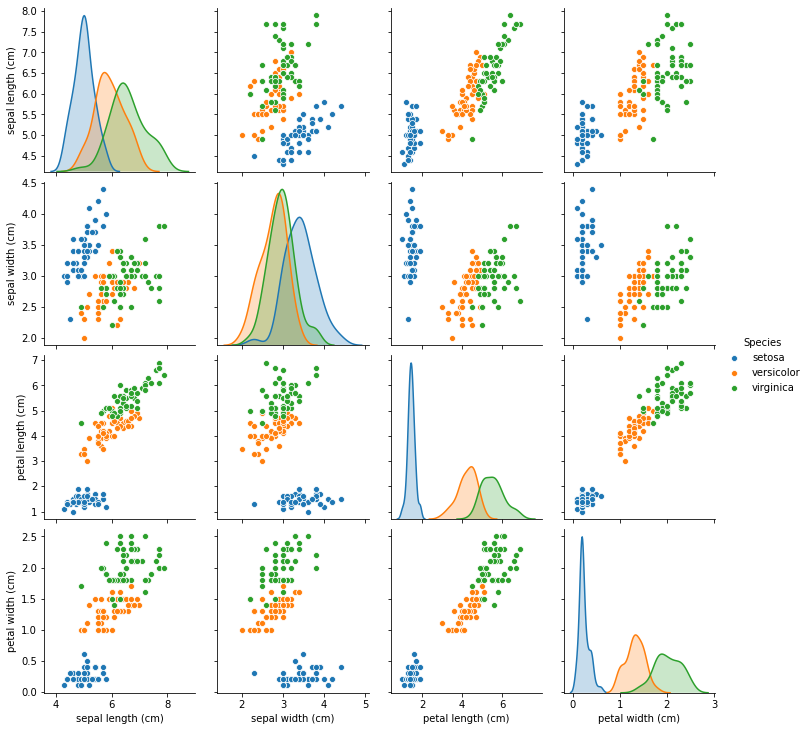

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Species'] = np.array([iris.target_names[cls] for cls in iris.target])
sns.pairplot(iris_df, hue='Species')

мы видим, что у нас синий класс, то есть setosa, линейно разделим. Мы можем использовать даже какую-то линейную модель, для того чтобы определить, что наш цветок принадлежит именно к этому классу. Однако зеленый и красный класс гораздо более сильно похожи друг на друга, поэтому здесь уже нужно строить какую-то не линейную зависимость, и строить более сложную модель, например, модель основанную на решающих деревьях. 

ансамбль RandomForestClassifier, который позволяет решать задачу квалификации. Однако, конечно, с помощью случайного леса можно решать задачу регрессии и соответствующий класс есть в этом модуле

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

Давайте дистанцируем наш класс.

У нас будет случайный лес, в котором сто деревьев и зафиксируем какой-то случайный seed.

Разобьем нашу выборку на тестовую и тренировочную выборку в соотношении 70 на 30.


Как сохранить соотношения классов при случайном разбиении выборки на тренировочную и тестовую при помощи функции train_test_split из библиотеки scikit-learn?
новый параметр stratify.
Очень важно, когда мы решаем задачу классификации, сделать так чтобы в нашем разбиении сохранялось распределение классов таким образом, чтобы мы не обучались на данных, в которых, например, нет какого-то одного класса, который потом появится в тестовой выборке. В таком случае мы никак не сможем обучиться и узнать природную зависимость про этот класс. Нужно чтобы соотношение классов сохранялось при разбиении. 

То же самое важно, когда мы делаем кросс-валидацию. В данном случае полезно использовать stratify scaffold, а не обычный scaffold

In [5]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target,
    test_size = 0.3, stratify = iris.target, random_state = 42)

rf_model = random_forest.fit(x_train, y_train)

In [6]:
predictions = rf_model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.89


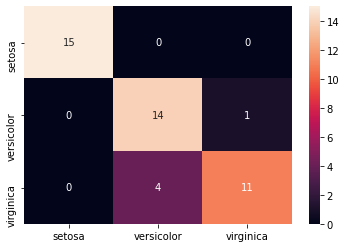

In [7]:
confusions_scores = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusions_scores, columns = iris.target_names, index = iris.target_names,)
sns.heatmap(confusion_df, annot=True)

Как мы видим и правда "sitosa" - это тот самый синий класс, достаточно хорошо разделим и мы в нем не ошибаемся. Однако другие два класса немного смешиваются, потому что они похожи друг на друга.

feature_importance. То есть, на то какой признак внес наибольший вклад в предсказания. У каких признаков наибольшая предсказательная способность.

In [8]:
rf_model.feature_importances_

array([0.12060778, 0.02427322, 0.4002267 , 0.45489229])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
feature_importance = list(zip(iris.feature_names, rf_model.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'RF Importance'])
feature_importance_df

,Feature,RF Importance
0,sepal length (cm),0.120608
1,sepal width (cm),0.024273
2,petal length (cm),0.400227
3,petal width (cm),0.454892


 В данном случае, случайный лес считает, что лучше всего определить класс цветка по ширине лепестка petal width . 

Конечно, у моделей существуют гораздо больше параметров, чем мы использовали. Можно включать и выключать bootstrap, ограничивать, например, глубину дерева, менять количество решающих деревьев и так далее. Например, из полезных можно всегда считать oob_score. То есть, смотреть качество на тех объектах, которые не использовались при обучении наших решающих деревьев. 

In [11]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Град бустинг

Похожим образом можно также использовать градиентный бустинг. Здесь тоже он решает задачу классификации. Тоже можно решать задачу регрессии. Но для ирисов у нас классификация. 

In [12]:
from sklearn.ensemble import GradientBoostingClassifier


gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
gb_model = gradient_boosting.fit(x_train, y_train)

print('Accuracy: {:.2f}'.format(gb_model.score(x_test, y_test)))

Accuracy: 0.96


Можно также посмотреть на качество, на то, как градиентный бустинг считает важностью различных признаков. В данном случае мы видим, что качество распределяется немного по другому и признаки обладают немного другой важностью. Что логично, потому что это другая модель. 

In [13]:
feature_importance_df['GB Importance'] = gb_model.feature_importances_
feature_importance_df

,Feature,RF Importance,GB Importance
0,sepal length (cm),0.120608,0.010722
1,sepal width (cm),0.024273,0.010274
2,petal length (cm),0.400227,0.339782
3,petal width (cm),0.454892,0.639223


In [14]:
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}